In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import OrderedDict
import analysisCode
import plots
import os

In [2]:
factor_sToGyr= (3.15*10**7)*(10.**9)
H0= 70./(3.086*10**19) # 1/s

In [3]:
def runAll(filenameTag, plotTitle, a_0=1., hwSpecific= True, 
           tPlotMax= 100, aPlotMax= 5, aLegendloc= 4, adotLegendloc= None,
           adotPlotMin= 0., adotPlotMax= .5, 
           rhoPlotMax= 30, HPlotMax= 300, 
           miscCases1= False, miscCases2= False, miscCases3= False):
    Omega_M0, Omega_DE0, Omega_rad0, w= OrderedDict(), OrderedDict(), OrderedDict(), OrderedDict()
    
    if hwSpecific:
        key= '$\Omega_M= 1; \Omega_{DE}= 0; flat $'
        Omega_M0[key], Omega_DE0[key], Omega_rad0[key], w[key]= 1., 0., 0., 0.

        key= '$\Omega_M= 0.3; \Omega_{DE}= 0.7; w= -1; flat$'
        Omega_M0[key], Omega_DE0[key], Omega_rad0[key], w[key]= 0.3, 0.7, 0, -1.

        key= '$\Omega_M= 0.3; \Omega_{DE}= 0.7; w= -2/3; flat$'
        Omega_M0[key], Omega_DE0[key], Omega_rad0[key], w[key]= 0.3, 0.7, 0., -2./3

        key= '$\Omega_M= 0.3; \Omega_{DE}= 0.7; w= -4/3; flat$'
        Omega_M0[key], Omega_DE0[key], Omega_rad0[key], w[key]= 0.3, 0.7, 0., -4/3.

        key= '$\Omega_M= 2.0; \Omega_{DE}= 0.; +curvature$'
        Omega_M0[key], Omega_DE0[key], Omega_rad0[key], w[key]= 2.0, 0., 0., 0.

        key= '$\Omega_M= 0.3; \Omega_{DE}= 0.; -curvature$'
        Omega_M0[key], Omega_DE0[key], Omega_rad0[key], w[key]= 0.3, 0., 0., 0.
        
    elif miscCases1:
        key= '$\Omega_M= 1; \Omega_{DE}= 0; flat $'
        Omega_M0[key], Omega_DE0[key], Omega_rad0[key], w[key]= 1., 0., 0., 0.
        
        key= '$\Omega_M= 0.7; \Omega_r= 0.3; \Omega_{DE}= 0; flat $'
        Omega_M0[key], Omega_DE0[key], Omega_rad0[key], w[key]= 0.7, 0., 0.3, 0.
        
    elif miscCases2:
        key= '$\Omega_M= 0.3; \Omega_{DE}= 0.; -curvature$'
        Omega_M0[key], Omega_DE0[key], Omega_rad0[key], w[key]= 0.3, 0., 0., 0.
        
        key= '$\Omega_M= 0.2; \Omega_r= 0.1; \Omega_{DE}= 0.; -curvature$'
        Omega_M0[key], Omega_DE0[key], Omega_rad0[key], w[key]= 0.3, 0., 0.1, 0.
        
    elif miscCases3:
        key= '$\Omega_M= 2.0; \Omega_{DE}= 0.; +curvature$'
        Omega_M0[key], Omega_DE0[key], Omega_rad0[key], w[key]= 2.0, 0., 0., 0.

        key= '$\Omega_M= 2.0; \Omega_r= 1.; \Omega_{DE}= 0.; +curvature$'
        Omega_M0[key], Omega_DE0[key], Omega_rad0[key], w[key]= 2.0, 0., 1., 0.
    
    a, adot, t, rhoTot= OrderedDict(), OrderedDict(), OrderedDict(), OrderedDict()
    for key in w:
        print key
        a[key], adot[key], t[key]= analysisCode.specificUniverse(Omega_M0[key], Omega_rad0[key], 
                                                                 Omega_DE0[key], w[key], 
                                                                 H0= H0, factor_sToGyr= factor_sToGyr,
                                                                 a_0= a_0)
        rhoTot[key]= analysisCode.totDensity(a[key], Omega_M0[key], Omega_rad0[key], Omega_DE0[key], w[key])
        print ''
        
    workDir= os.getcwd()
    outputDir= workDir+'/outputPlots/'
    plots.scaleFactorPlot(a,t,H0,factor_sToGyr, xMax= tPlotMax, yMax= aPlotMax,
                          legendloc= aLegendloc,
                         savePlots= True, outDir= outputDir, filenameTag= filenameTag, plotTitle= plotTitle )
    plots.adotPlot(adot,t,H0,factor_sToGyr, xMax= tPlotMax, yMax= adotPlotMax, yMin= adotPlotMin,
                   legendloc= adotLegendloc,
                         savePlots= True, outDir= outputDir, filenameTag= filenameTag, plotTitle= plotTitle )
    plots.densityPlot(rhoTot,t,H0,factor_sToGyr, xMax= tPlotMax, yMax= rhoPlotMax,
                     savePlots= True, outDir= outputDir, filenameTag= filenameTag, plotTitle= plotTitle  )
    plots.HubbleConstantPlot(a,adot,t,H0,factor_sToGyr, xMax= tPlotMax, yMax= HPlotMax,
                             savePlots= True, outDir= outputDir, filenameTag= filenameTag, plotTitle= plotTitle  )
    analysisCode.universeAge(a, a_0, H0,Omega_M0, Omega_rad0, Omega_DE0, w, factor_sToGyr)

In [4]:
aPlotMax= 7
rhoPlotMax= 7
HPlotMax= 300
adotPlotMax= 1. #10**-17# 10**-136
adotPlotMin= -0.1 #10**-22# 10**-136

$\Omega_M= 1; \Omega_{DE}= 0; flat $
Omega_k: 0.0

$\Omega_M= 0.3; \Omega_{DE}= 0.7; w= -1; flat$
Omega_k: 0.0

$\Omega_M= 0.3; \Omega_{DE}= 0.7; w= -2/3; flat$
Omega_k: 0.0

$\Omega_M= 0.3; \Omega_{DE}= 0.7; w= -4/3; flat$
Omega_k: 0.0

$\Omega_M= 2.0; \Omega_{DE}= 0.; +curvature$
Omega_k: -1.0

$\Omega_M= 0.3; \Omega_{DE}= 0.; -curvature$
Omega_k: 0.7



analysisCode.py:8: RuntimeWarning: invalid value encountered in sqrt
  dadt= H0*np.sqrt(Omega_M0*a**-1.+Omega_rad0*a**-2.+Omega_DE0*a**(-3.*w-1.)+Omega_k0)
analysisCode.py:9: RuntimeWarning: invalid value encountered in sqrt
  daSqdtSq= -(H0/2.)*adot*(Omega_M0*a**-3.+2.*Omega_rad0*a**(-4)+(1.+3.*w)*Omega_DE0*a**(-3.*(1.+w)))/(np.sqrt(Omega_M0*a**-3.+Omega_rad0*a**(-4)+Omega_DE0*a**(-3.*(1+w))+ Omega_k0*a**-2.))
analysisCode.py:8: RuntimeWarning: overflow encountered in double_scalars
  dadt= H0*np.sqrt(Omega_M0*a**-1.+Omega_rad0*a**-2.+Omega_DE0*a**(-3.*w-1.)+Omega_k0)
/Users/Humna/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
analysisCode.py:60: RuntimeWarning: divide by zero encountered in power
  return Omega_M0*a**-3.+Omega_rad0*a**-4.+ Omega_DE0*a**(-3.*(1+w))
analysisCode.

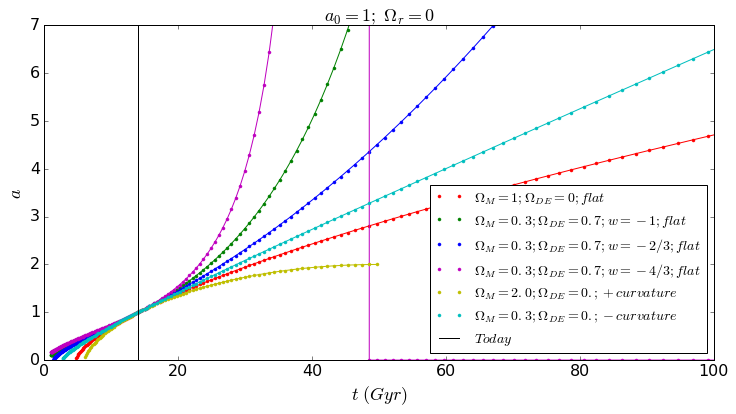

plots.py:52: RuntimeWarning: overflow encountered in multiply
  plt.plot(tscaled, adot[key]*factor_sToGyr, '.', label= key, color= colors[i])
plots.py:53: RuntimeWarning: overflow encountered in multiply
  plt.plot(tscaled, adot[key]*factor_sToGyr, color= colors[i])


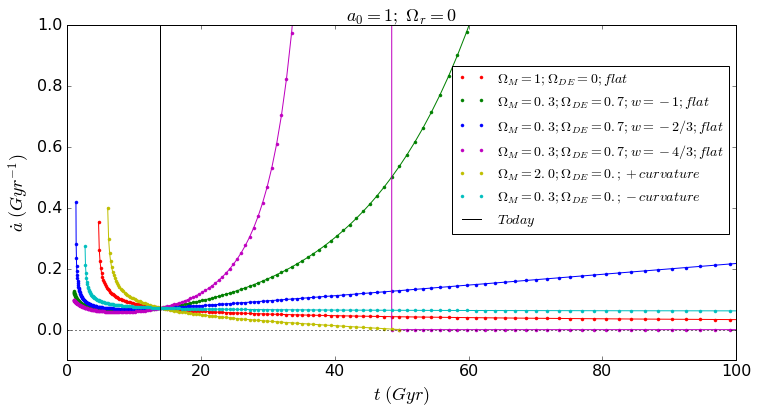

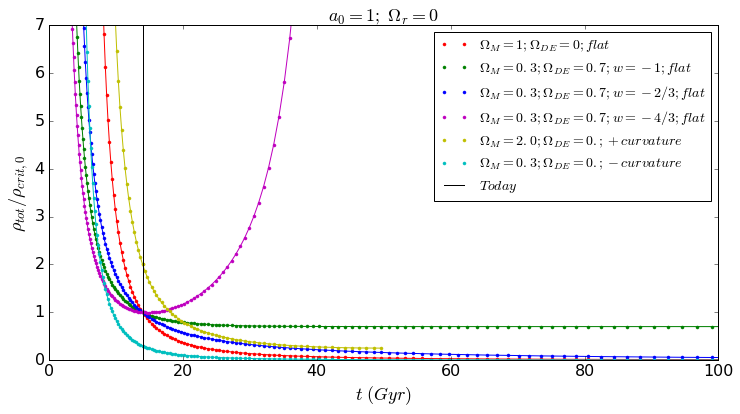

plots.py:115: RuntimeWarning: overflow encountered in divide
  H[key]= adot[key]/a[key]  # 1/s
plots.py:115: RuntimeWarning: invalid value encountered in divide
  H[key]= adot[key]/a[key]  # 1/s
plots.py:116: RuntimeWarning: overflow encountered in multiply
  H[key]= H[key]*3.086*10**19
plots.py:115: RuntimeWarning: divide by zero encountered in divide
  H[key]= adot[key]/a[key]  # 1/s


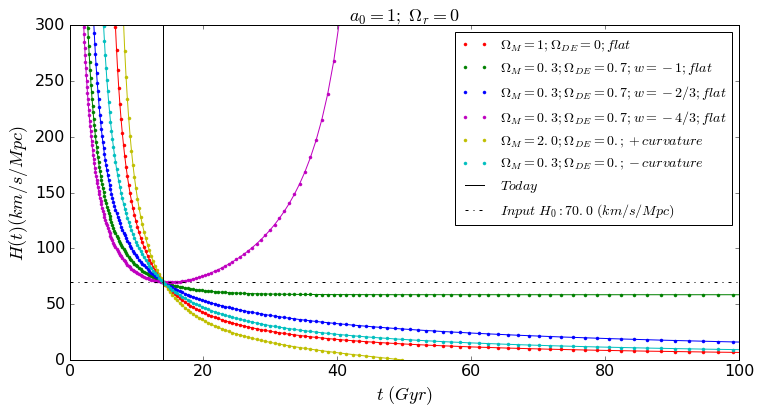

t0 for $\Omega_M= 1; \Omega_{DE}= 0; flat $:
9.330310 (Gyrs)

t0 for $\Omega_M= 0.3; \Omega_{DE}= 0.7; w= -1; flat$:
13.493019 (Gyrs)

t0 for $\Omega_M= 0.3; \Omega_{DE}= 0.7; w= -2/3; flat$:
12.641726 (Gyrs)

t0 for $\Omega_M= 0.3; \Omega_{DE}= 0.7; w= -4/3; flat$:
14.074889 (Gyrs)

t0 for $\Omega_M= 2.0; \Omega_{DE}= 0.; +curvature$:
7.988560 (Gyrs)

t0 for $\Omega_M= 0.3; \Omega_{DE}= 0.; -curvature$:
11.319438 (Gyrs)

t0 using H0 given (Gyrs): 13.9954648526


In [5]:
runAll(filenameTag= 'givenModels_', plotTitle= r'$a_0=1; \ \Omega_r=0$', 
       aPlotMax= aPlotMax, adotPlotMax=adotPlotMax, adotPlotMin=adotPlotMin,
       rhoPlotMax= rhoPlotMax, HPlotMax= HPlotMax, )

$\Omega_M= 1; \Omega_{DE}= 0; flat $
Omega_k: 0.0

$\Omega_M= 0.3; \Omega_{DE}= 0.7; w= -1; flat$
Omega_k: 0.0

$\Omega_M= 0.3; \Omega_{DE}= 0.7; w= -2/3; flat$
Omega_k: 0.0

$\Omega_M= 0.3; \Omega_{DE}= 0.7; w= -4/3; flat$
Omega_k: 0.0

$\Omega_M= 2.0; \Omega_{DE}= 0.; +curvature$
Omega_k: -1.0

$\Omega_M= 0.3; \Omega_{DE}= 0.; -curvature$
Omega_k: 0.7



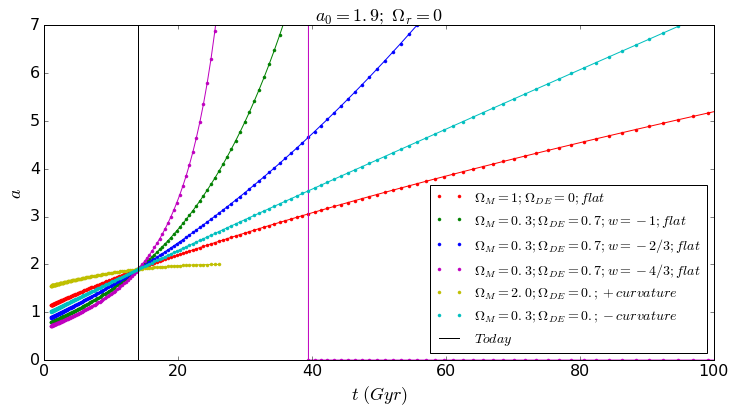

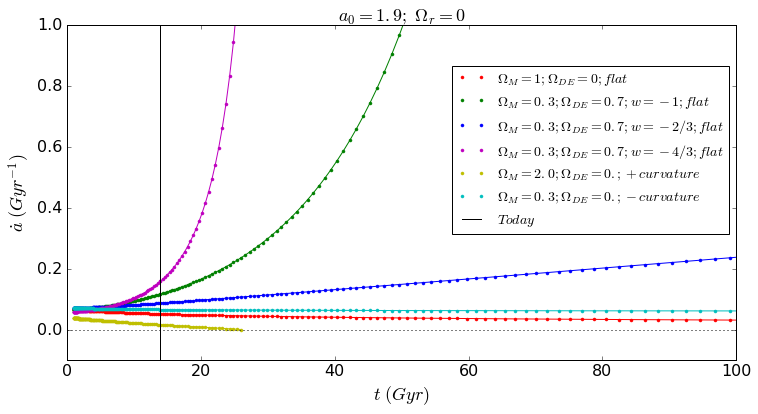

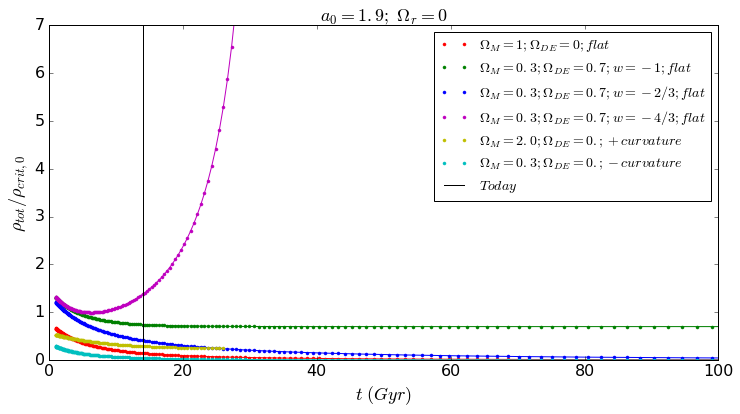

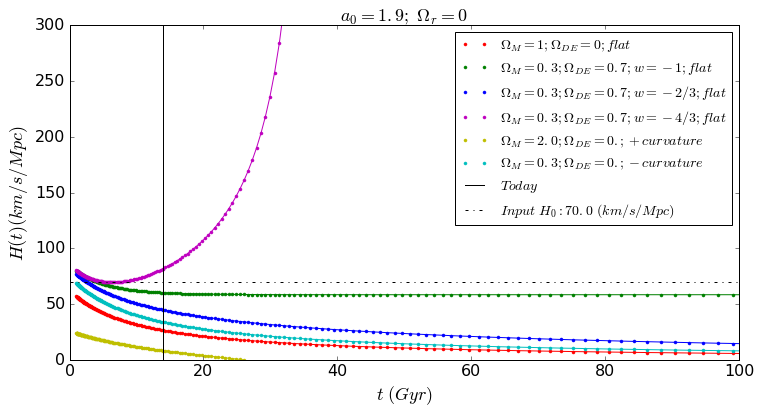

t0 for $\Omega_M= 1; \Omega_{DE}= 0; flat $:
24.435795 (Gyrs)

t0 for $\Omega_M= 0.3; \Omega_{DE}= 0.7; w= -1; flat$:
23.361392 (Gyrs)

t0 for $\Omega_M= 0.3; \Omega_{DE}= 0.7; w= -2/3; flat$:
24.061667 (Gyrs)

t0 for $\Omega_M= 0.3; \Omega_{DE}= 0.7; w= -4/3; flat$:
22.616240 (Gyrs)

t0 for $\Omega_M= 2.0; \Omega_{DE}= 0.; +curvature$:
31.555238 (Gyrs)

t0 for $\Omega_M= 0.3; \Omega_{DE}= 0.; -curvature$:
24.504270 (Gyrs)

t0 using H0 given (Gyrs): 13.9954648526


In [6]:
a_0= 1.9
runAll(filenameTag= 'rescaleda0Larger_givenModels_', 
       plotTitle= r'$a_0=%s; \ \Omega_r=0$'%(a_0), 
       a_0=a_0, aPlotMax= aPlotMax, adotPlotMax=adotPlotMax, adotPlotMin=adotPlotMin,
       rhoPlotMax= rhoPlotMax, HPlotMax= HPlotMax, )

$\Omega_M= 1; \Omega_{DE}= 0; flat $
Omega_k: 0.0

$\Omega_M= 0.3; \Omega_{DE}= 0.7; w= -1; flat$
Omega_k: 0.0

$\Omega_M= 0.3; \Omega_{DE}= 0.7; w= -2/3; flat$
Omega_k: 0.0

$\Omega_M= 0.3; \Omega_{DE}= 0.7; w= -4/3; flat$
Omega_k: 0.0

$\Omega_M= 2.0; \Omega_{DE}= 0.; +curvature$
Omega_k: -1.0

$\Omega_M= 0.3; \Omega_{DE}= 0.; -curvature$
Omega_k: 0.7



analysisCode.py:9: RuntimeWarning: invalid value encountered in double_scalars
  daSqdtSq= -(H0/2.)*adot*(Omega_M0*a**-3.+2.*Omega_rad0*a**(-4)+(1.+3.*w)*Omega_DE0*a**(-3.*(1.+w)))/(np.sqrt(Omega_M0*a**-3.+Omega_rad0*a**(-4)+Omega_DE0*a**(-3.*(1+w))+ Omega_k0*a**-2.))


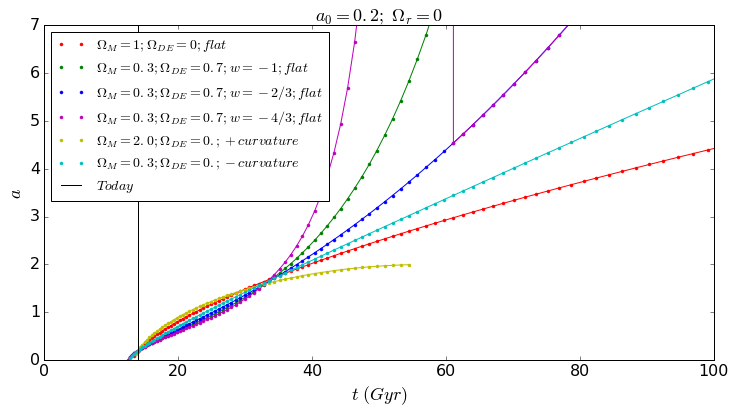

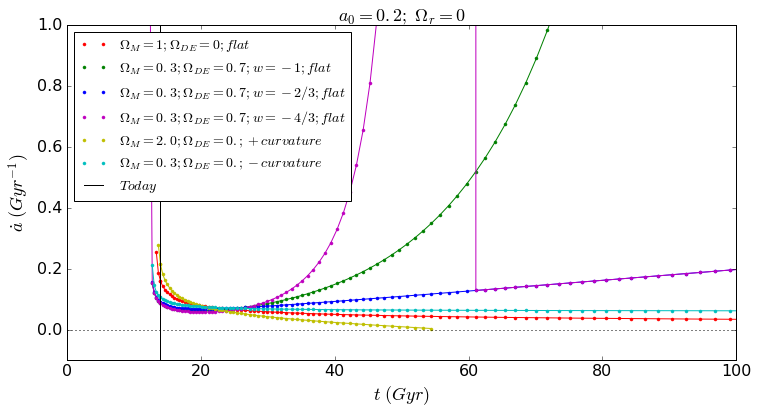

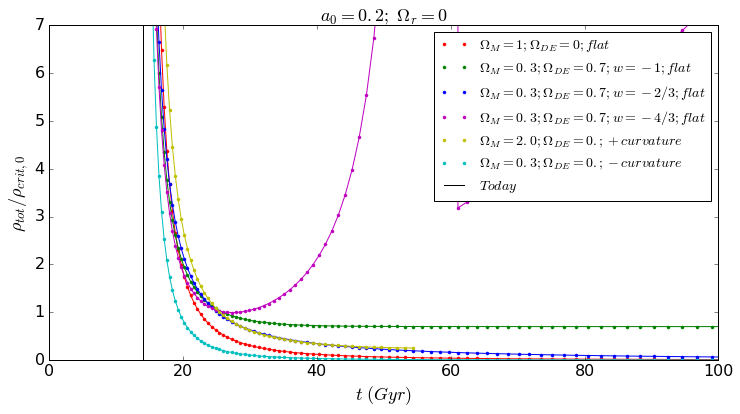

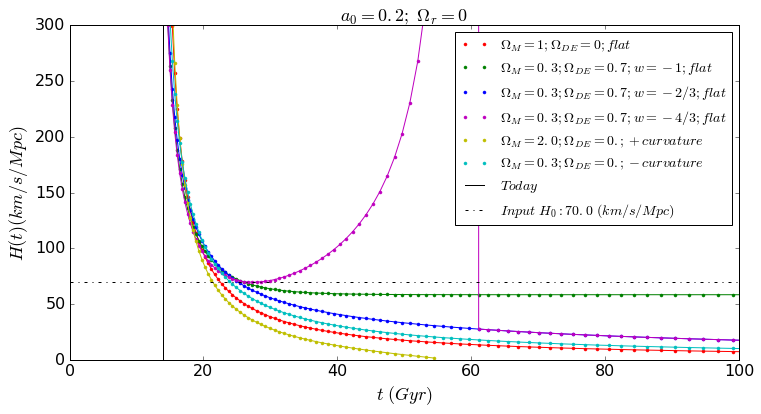

t0 for $\Omega_M= 1; \Omega_{DE}= 0; flat $:
0.834528 (Gyrs)

t0 for $\Omega_M= 0.3; \Omega_{DE}= 0.7; w= -1; flat$:
1.518932 (Gyrs)

t0 for $\Omega_M= 0.3; \Omega_{DE}= 0.7; w= -2/3; flat$:
1.494445 (Gyrs)

t0 for $\Omega_M= 0.3; \Omega_{DE}= 0.7; w= -4/3; flat$:
1.522859 (Gyrs)

t0 for $\Omega_M= 2.0; \Omega_{DE}= 0.; +curvature$:
0.608818 (Gyrs)

t0 for $\Omega_M= 0.3; \Omega_{DE}= 0.; -curvature$:
1.351510 (Gyrs)

t0 using H0 given (Gyrs): 13.9954648526


In [7]:
a_0= .2
runAll(filenameTag= 'rescaleda0Smaller_givenModels_', 
       plotTitle= r'$a_0=%s; \ \Omega_r=0$'%(a_0), a_0=a_0, aLegendloc= 2, adotLegendloc=2,
       aPlotMax= aPlotMax, adotPlotMax=adotPlotMax, adotPlotMin=adotPlotMin, 
       rhoPlotMax= rhoPlotMax, HPlotMax= HPlotMax, )

$\Omega_M= 1; \Omega_{DE}= 0; flat $
Omega_k: 0.0

$\Omega_M= 0.7; \Omega_r= 0.3; \Omega_{DE}= 0; flat $
Omega_k: 5.55111512313e-17



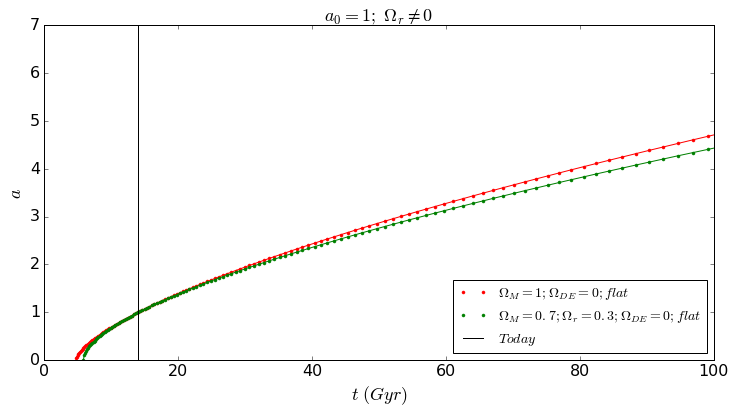

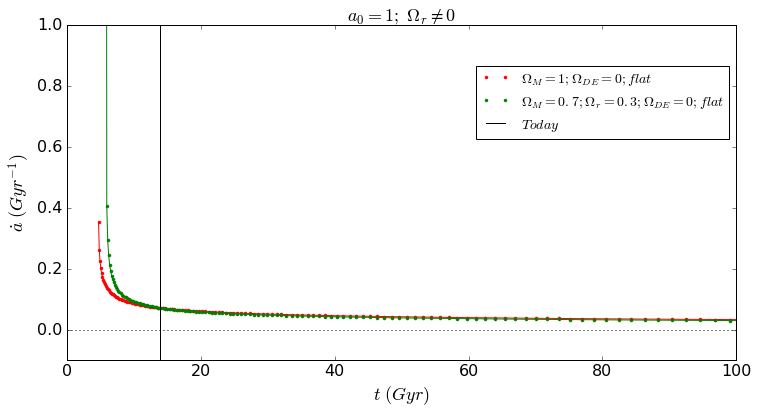

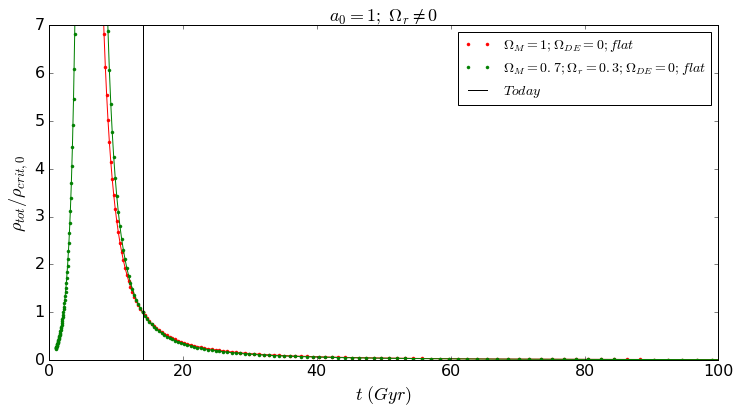

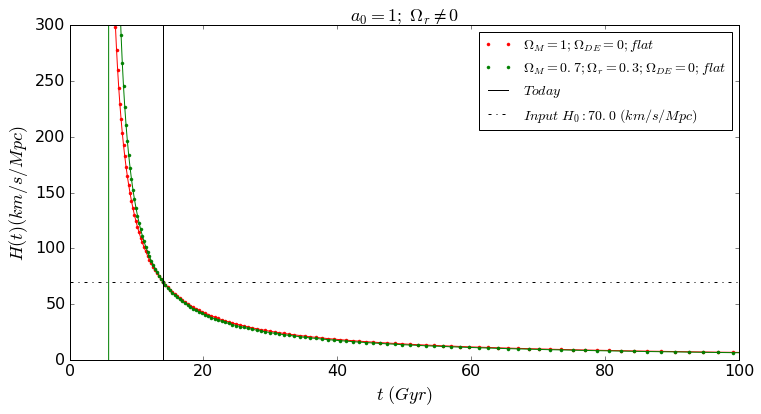

t0 for $\Omega_M= 1; \Omega_{DE}= 0; flat $:
9.330310 (Gyrs)

t0 for $\Omega_M= 0.7; \Omega_r= 0.3; \Omega_{DE}= 0; flat $:
8.161803 (Gyrs)

t0 using H0 given (Gyrs): 13.9954648526


In [8]:
runAll(filenameTag= 'nonZeroOmegaRad_flat_', plotTitle= r'$a_0=1; \ \Omega_r\neq0$', 
       hwSpecific= False, miscCases1=True,
       aPlotMax= aPlotMax, adotPlotMax=adotPlotMax, adotPlotMin=adotPlotMin,
       rhoPlotMax= rhoPlotMax, HPlotMax= HPlotMax, )

$\Omega_M= 0.3; \Omega_{DE}= 0.; -curvature$
Omega_k: 0.7

$\Omega_M= 0.2; \Omega_r= 0.1; \Omega_{DE}= 0.; -curvature$
Omega_k: 0.6



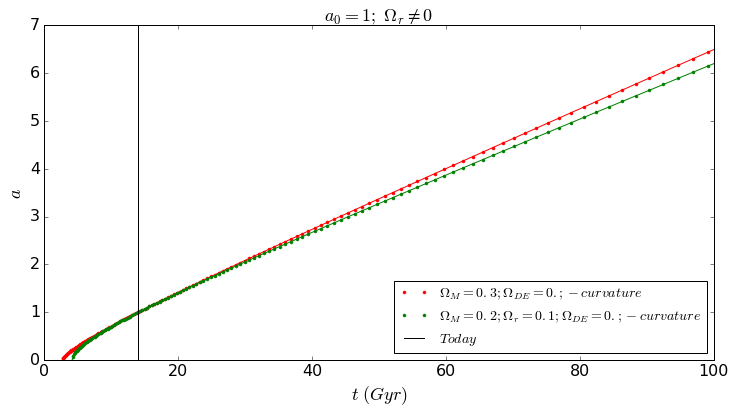

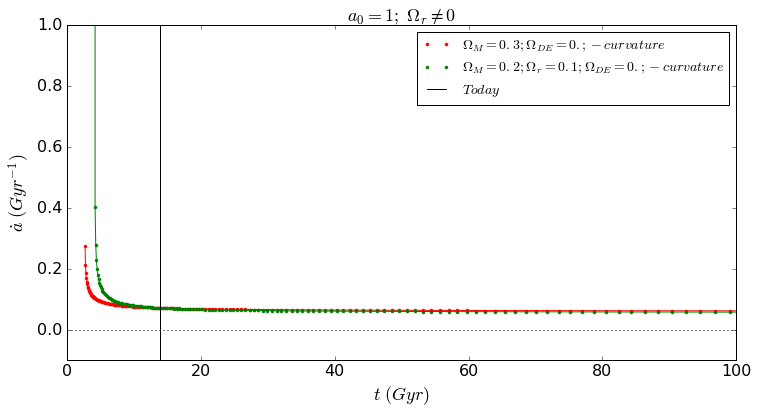

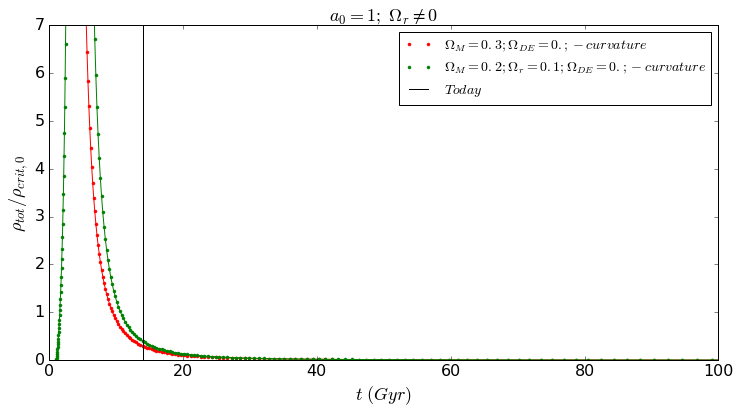

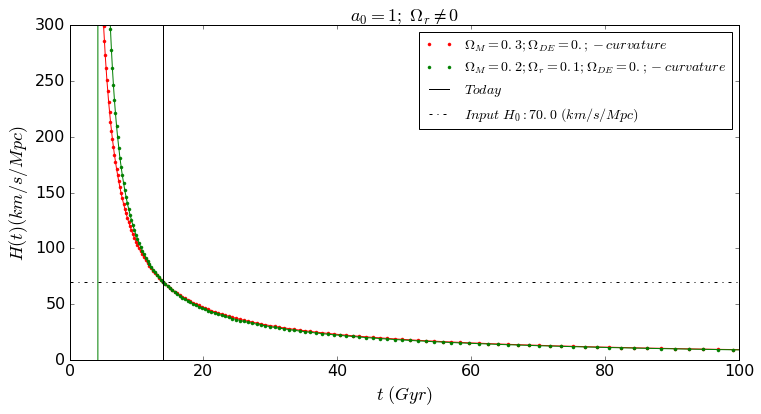

t0 for $\Omega_M= 0.3; \Omega_{DE}= 0.; -curvature$:
11.319438 (Gyrs)

t0 for $\Omega_M= 0.2; \Omega_r= 0.1; \Omega_{DE}= 0.; -curvature$:
9.848253 (Gyrs)

t0 using H0 given (Gyrs): 13.9954648526


In [9]:
runAll(filenameTag= 'nonZeroOmegaRad_negCurv_', plotTitle= r'$a_0=1; \ \Omega_r\neq0$', 
       hwSpecific= False, miscCases2=True, adotLegendloc= 0,
       aPlotMax= aPlotMax, adotPlotMax=adotPlotMax, adotPlotMin=adotPlotMin,
       rhoPlotMax= rhoPlotMax, HPlotMax= HPlotMax, )

$\Omega_M= 2.0; \Omega_{DE}= 0.; +curvature$
Omega_k: -1.0

$\Omega_M= 2.0; \Omega_r= 1.; \Omega_{DE}= 0.; +curvature$
Omega_k: -2.0



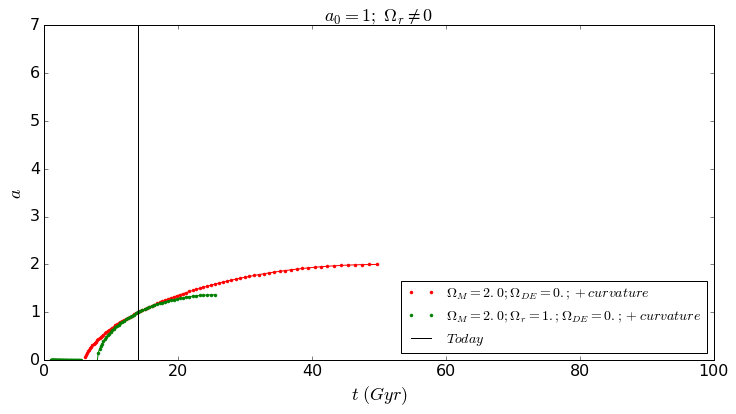

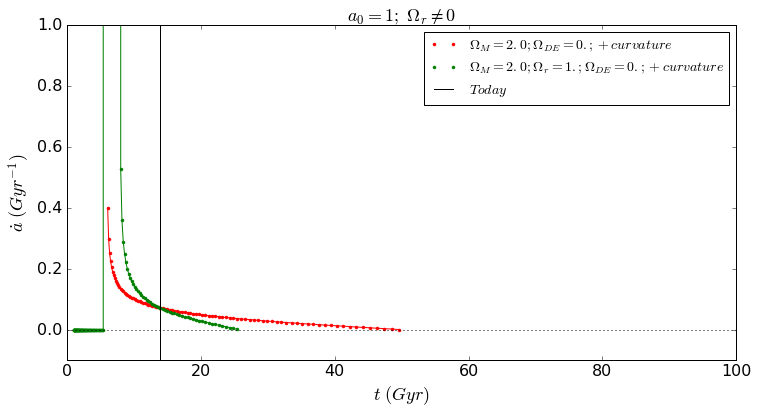

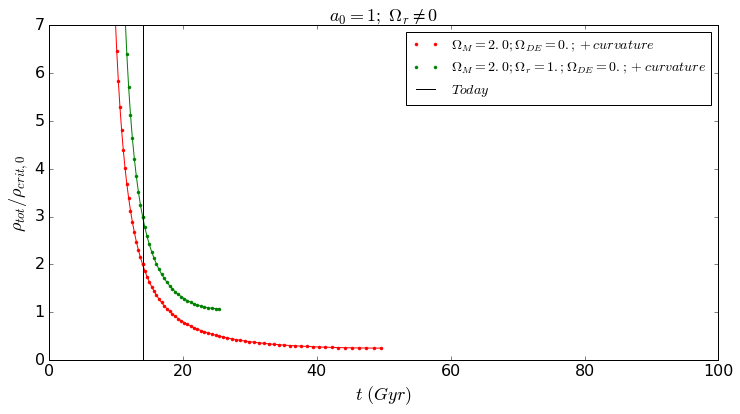

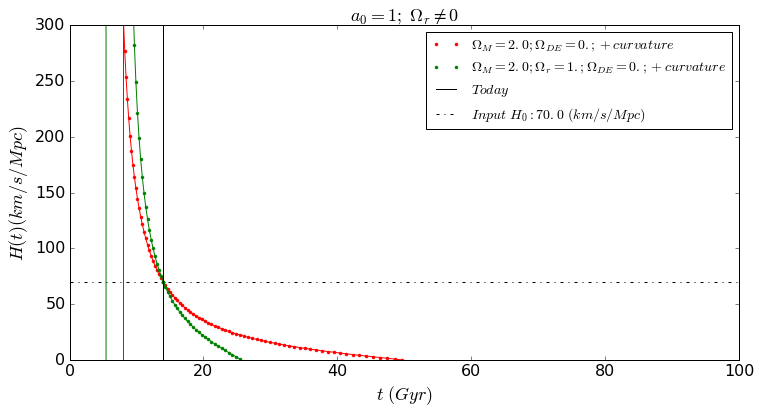

t0 for $\Omega_M= 2.0; \Omega_{DE}= 0.; +curvature$:
7.988560 (Gyrs)

t0 for $\Omega_M= 2.0; \Omega_r= 1.; \Omega_{DE}= 0.; +curvature$:
6.090965 (Gyrs)

t0 using H0 given (Gyrs): 13.9954648526


In [10]:
runAll(filenameTag= 'nonZeroOmegaRad_posCurv_', plotTitle= r'$a_0=1; \ \Omega_r\neq0$', 
       hwSpecific= False, miscCases3=True, adotLegendloc= 0,
       aPlotMax= aPlotMax, adotPlotMax=adotPlotMax, adotPlotMin=adotPlotMin,
       rhoPlotMax= rhoPlotMax, HPlotMax= HPlotMax, )